In [35]:
import tensorflow as tf
print(tf.__version__)

1.9.0


In [36]:
mnist = tf.keras.datasets.fashion_mnist

In [37]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
 

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

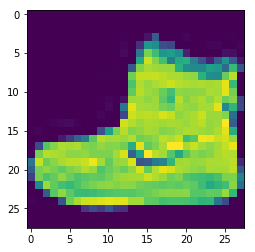

In [38]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [39]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [40]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [41]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.5015 - acc: 0.8226
Epoch 2/15
60000/60000 [==============================] - 4s 67us/step - loss: 0.3755 - acc: 0.8648
Epoch 3/15
60000/60000 [==============================] - 4s 68us/step - loss: 0.3354 - acc: 0.8783
Epoch 4/15
60000/60000 [==============================] - 5s 78us/step - loss: 0.3113 - acc: 0.8866
Epoch 5/15
60000/60000 [==============================] - 5s 84us/step - loss: 0.2937 - acc: 0.8901
Epoch 6/15
60000/60000 [==============================] - 5s 83us/step - loss: 0.2781 - acc: 0.8974
Epoch 7/15
60000/60000 [==============================] - 5s 83us/step - loss: 0.2673 - acc: 0.8997
Epoch 8/15
60000/60000 [==============================] - 5s 83us/step - loss: 0.2553 - acc: 0.9048
Epoch 9/15
60000/60000 [==============================] - 5s 81us/step - loss: 0.2439 - acc: 0.9086
Epoch 10/15
60000/60000 [==============================] - 9s 152us/step - loss: 0.2380 - acc: 0.911

In [42]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 56us/step


[0.336949910902977, 0.8891]

In [43]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks] )


1.9.0
Epoch 1/5
60000/60000 [==============================] - 11s 186us/step - loss: 0.4726 - acc: 0.8307
Epoch 2/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.3602 - acc: 0.8682

Reached 60% accuracy so cancelling training!
